# Importación de librerías y configuración

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Carga de datos

In [ ]:
try:
    df_stories = pd.read_csv('../../../data/generated/historias.csv')
    df_tramas = pd.read_csv('../../../data/generated/tramas.csv')
    print(f"Historias cargadas: {len(df_stories)}")
except FileNotFoundError as e:
    print(f"Error al cargar los archivos: {e}")

Historias cargadas: 2283


# Distribución de historias por país
Visualizamos y cuantificamos la distribución de historias por país para identificar posibles sesgos geográficos y evaluar la cobertura del dataset.

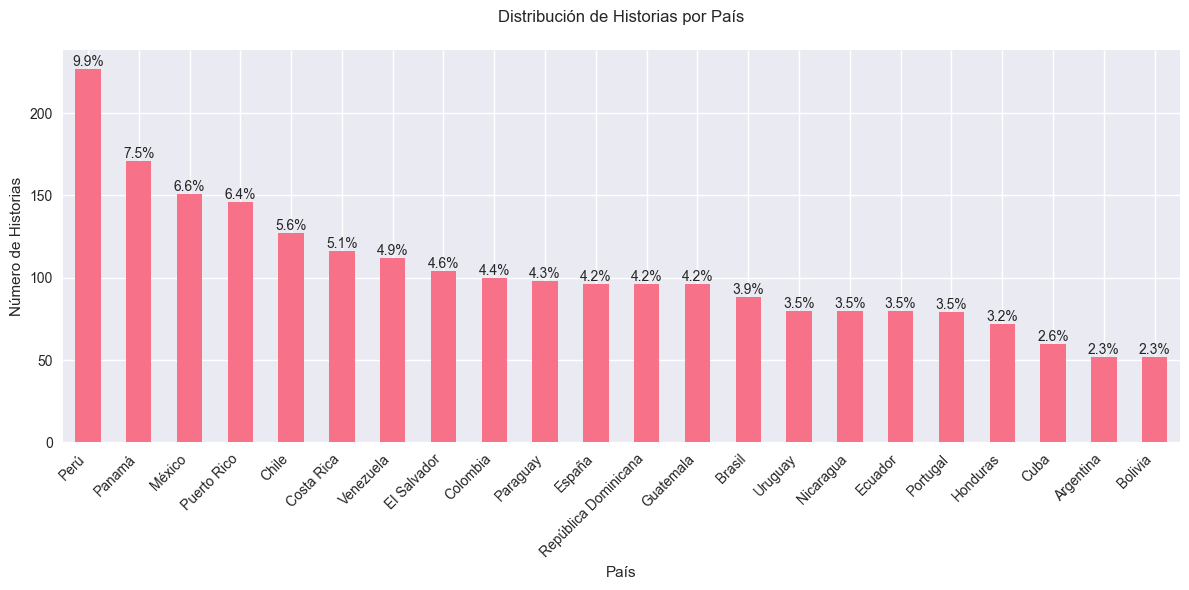


Distribución por País:
Perú: 227 (9.9%)
Panamá: 171 (7.5%)
México: 151 (6.6%)
Puerto Rico: 146 (6.4%)
Chile: 127 (5.6%)
Costa Rica: 116 (5.1%)
Venezuela: 112 (4.9%)
El Salvador: 104 (4.6%)
Colombia: 100 (4.4%)
Paraguay: 98 (4.3%)
España: 96 (4.2%)
República Dominicana: 96 (4.2%)
Guatemala: 96 (4.2%)
Brasil: 88 (3.9%)
Uruguay: 80 (3.5%)
Nicaragua: 80 (3.5%)
Ecuador: 80 (3.5%)
Portugal: 79 (3.5%)
Honduras: 72 (3.2%)
Cuba: 60 (2.6%)
Argentina: 52 (2.3%)
Bolivia: 52 (2.3%)


In [13]:
plt.figure(figsize=(12, 6))
country_counts = df_stories['pais'].value_counts()
ax = country_counts.plot(kind='bar')
plt.title('Distribución de Historias por País', pad=20)
plt.xlabel('País')
plt.ylabel('Número de Historias')
plt.xticks(rotation=45, ha='right')
total = len(df_stories)
for i, v in enumerate(country_counts):
    percentage = (v / total) * 100
    ax.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

print("\nDistribución por País:")
for country, count in country_counts.items():
    print(f"{country}: {count} ({count/total*100:.1f}%)")

# Top 10 temas más comunes
Identificamos los temas más frecuentes en las historias generadas. 

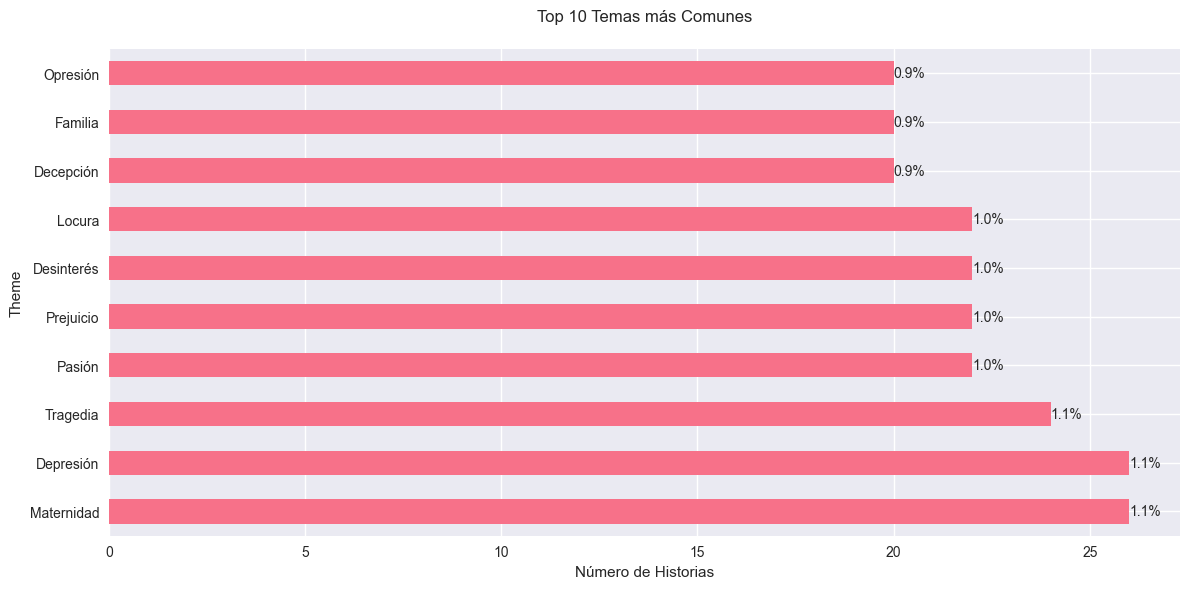


Top 10 Temas más Comunes:
Maternidad: 26 (1.1%)
Depresión: 26 (1.1%)
Tragedia: 24 (1.1%)
Pasión: 22 (1.0%)
Prejuicio: 22 (1.0%)
Desinterés: 22 (1.0%)
Locura: 22 (1.0%)
Decepción: 20 (0.9%)
Familia: 20 (0.9%)
Opresión: 20 (0.9%)


In [14]:
plt.figure(figsize=(12, 6))
theme_counts = df_stories['Theme'].value_counts().head(10)
ax = theme_counts.plot(kind='barh')
plt.title('Top 10 Temas más Comunes', pad=20)
plt.xlabel('Número de Historias')
total = len(df_stories)
for i, v in enumerate(theme_counts):
    percentage = (v / total) * 100
    ax.text(v, i, f'{percentage:.1f}%', va='center')
plt.tight_layout()
plt.show()

print("\nTop 10 Temas más Comunes:")
for theme, count in theme_counts.items():
    print(f"{theme}: {count} ({count/total*100:.1f}%)")

# Análisis de sesgos — longitud de historias por país

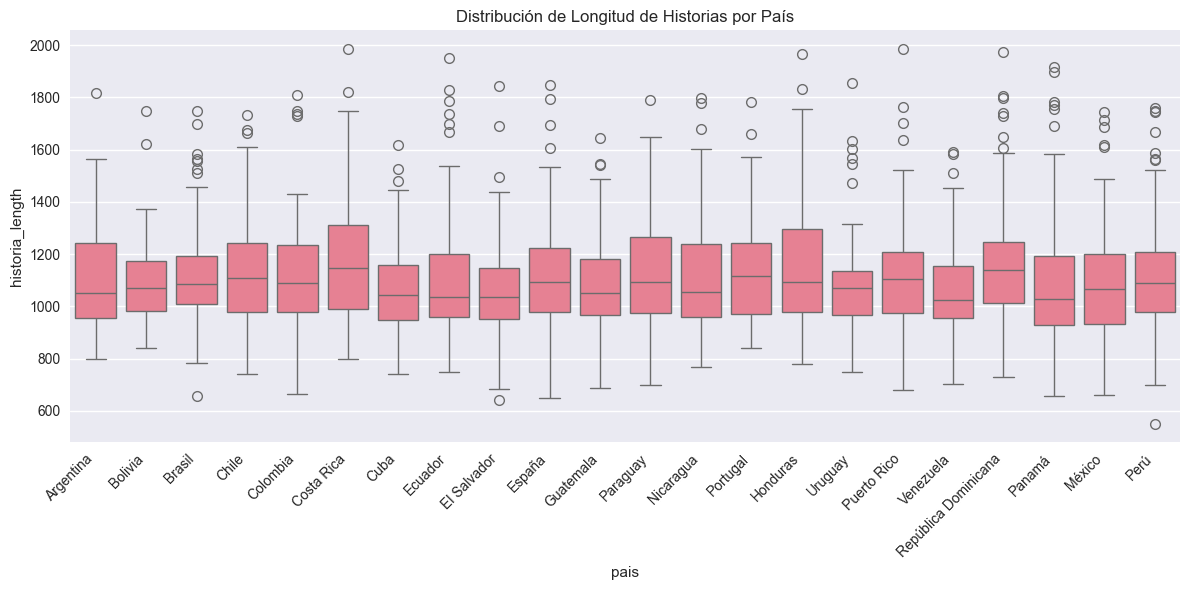


Longitud promedio de historias por país:
pais
Costa Rica              1165.517241
República Dominicana    1161.833333
Honduras                1156.986111
Chile                   1135.204724
Portugal                1129.848101
Brasil                  1123.886364
Paraguay                1117.122449
España                  1117.020833
Puerto Rico             1116.726027
Colombia                1113.960000
Ecuador                 1112.462500
Nicaragua               1108.412500
Argentina               1104.634615
Perú                    1101.325991
Bolivia                 1095.711538
Guatemala               1091.697917
Uruguay                 1090.987500
México                  1086.490066
Panamá                  1079.175439
Cuba                    1071.950000
El Salvador             1070.105769
Venezuela               1068.437500
Name: historia_length, dtype: float64


In [15]:
df_stories['historia_length'] = df_stories['answer'].str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(x='pais', y='historia_length', data=df_stories)
plt.title('Distribución de Longitud de Historias por País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nLongitud promedio de historias por país:")
print(df_stories.groupby('pais')['historia_length'].mean().sort_values(ascending=False))

# Análisis de sesgos — complejidad del lenguaje por país

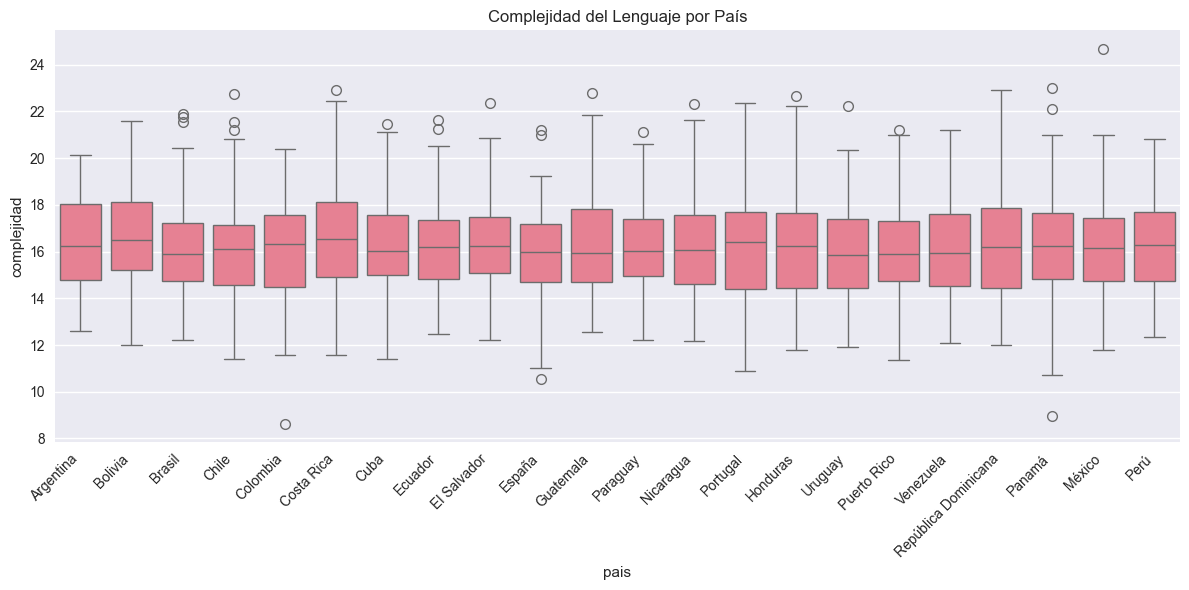


Complejidad promedio del lenguaje por país:
pais
Costa Rica              16.641944
Bolivia                 16.601045
República Dominicana    16.495665
El Salvador             16.410117
Guatemala               16.358132
Portugal                16.336757
Perú                    16.304728
Nicaragua               16.285339
Argentina               16.266400
México                  16.256732
Cuba                    16.254583
Venezuela               16.231786
Ecuador                 16.224965
Honduras                16.199558
Panamá                  16.180261
Colombia                16.138153
Puerto Rico             16.136269
Paraguay                16.128461
Brasil                  16.105004
Uruguay                 16.091521
Chile                   16.071001
España                  15.921090
Name: complejidad, dtype: float64


In [16]:
def calculate_complexity(text):
    if isinstance(text, str):
        words = text.split()
        sentences = text.split('.')
        return len(words) / max(len(sentences), 1)
    return 0

df_stories['complejidad'] = df_stories['answer'].apply(calculate_complexity)
plt.figure(figsize=(12, 6))
sns.boxplot(x='pais', y='complejidad', data=df_stories)
plt.title('Complejidad del Lenguaje por País')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nComplejidad promedio del lenguaje por país:")
print(df_stories.groupby('pais')['complejidad'].mean().sort_values(ascending=False))

# Distribución de temas por país (tabla cruzada)

In [18]:
theme_by_country = pd.crosstab(df_stories['pais'], df_stories['Theme'])
display(theme_by_country)

Theme,Abuso de poder,Adulterio,Adversidad,Aislamiento,Alegría,Alienación,Amabilidad,Ambiciones,Amistad,Amor,...,Vanidad,Venganza,Verdad,Viaje,Vicios,Vida,Vigilancia,Violencia,Virtud,Xenofobia
pais,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
Bolivia,2,0,0,2,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Brasil,2,2,2,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
Chile,0,0,0,2,0,2,0,0,0,2,...,0,0,2,0,0,2,0,2,2,0
Colombia,0,0,0,0,2,0,0,0,2,0,...,0,0,0,0,2,0,4,0,0,0
Costa Rica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cuba,2,0,0,0,0,2,0,2,0,2,...,0,0,0,0,0,0,0,0,2,0
Ecuador,0,0,0,0,2,0,0,0,2,0,...,0,0,0,0,0,0,0,0,2,2
El Salvador,0,0,0,0,2,0,0,2,0,2,...,2,0,0,0,0,0,6,2,0,0


# Radar de Temas por País

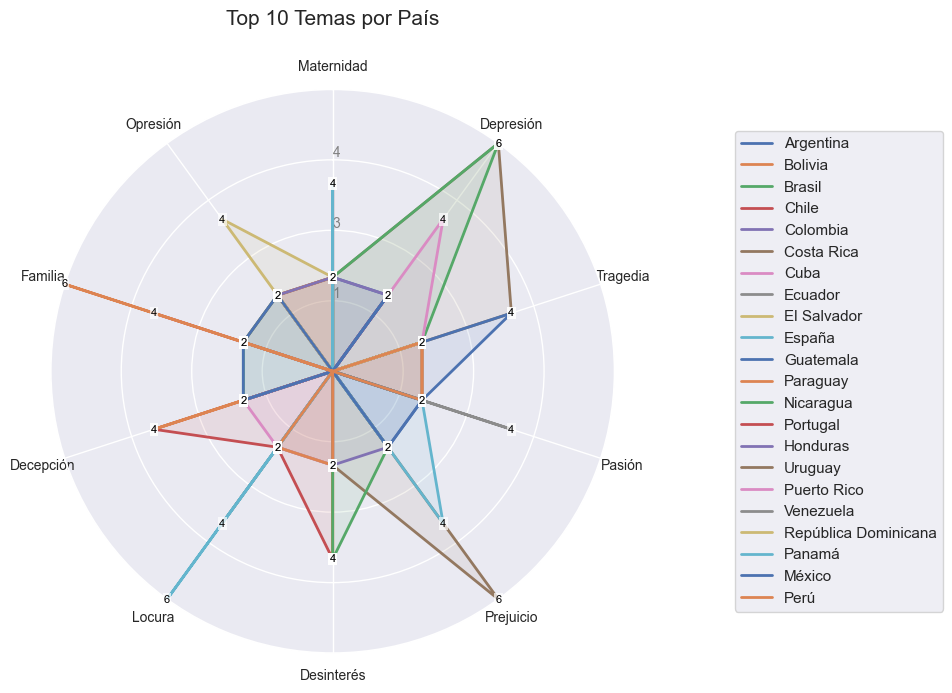


Top 10 temas más comunes:
Theme
Maternidad      26
Depresión       26
Tragedia        24
Pasión          22
Prejuicio       22
                ..
Infancia         4
Miedo            4
Adulterio        2
Pecado           2
Clase social     2
Name: count, Length: 208, dtype: int64


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('default')
sns.set_theme()

# Cargar datos
df_stories = pd.read_csv('../../../data/generated/historias.csv')

# Preparar los datos
top_themes = df_stories['Theme'].value_counts().head(10).index  # Top 10 temas
countries = df_stories['pais'].unique()

# Crear matriz de datos para el gráfico de radar
data = []
for country in countries:
    country_data = []
    for theme in top_themes:
        count = len(df_stories[(df_stories['pais'] == country) & (df_stories['Theme'] == theme)])
        country_data.append(count)
    data.append(country_data)

# Configurar el gráfico
angles = np.linspace(0, 2*np.pi, len(top_themes), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el polígono
data = np.concatenate((data, np.array(data)[:, 0:1]), axis=1)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Dibujar los ejes
plt.xticks(angles[:-1], top_themes, size=10, rotation=45)

# Dibujar las líneas de la cuadrícula
ax.set_rlabel_position(0)
max_value = max([max(row) for row in data])
plt.yticks([max_value/4, max_value/2, 3*max_value/4], 
           [f"{int(max_value/4)}", f"{int(max_value/2)}", f"{int(3*max_value/4)}"], 
           color="grey", size=10)
plt.ylim(0, max_value)

# Dibujar los datos para cada país
for i, country in enumerate(countries):
    ax.plot(angles, data[i], linewidth=2, linestyle='solid', label=country)
    ax.fill(angles, data[i], alpha=0.1)
    
    # Añadir etiquetas con los valores numéricos
    for j, value in enumerate(data[i][:-1]):
        angle = angles[j]
        if value > 0:  # Solo mostrar etiquetas para valores mayores que 0
            ax.text(angle, value, f"{int(value)}", 
                   ha='center', va='center', 
                   size=8, color='black',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Añadir leyenda al mismo nivel que el gráfico
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

plt.title('Top 10 Temas por País', size=15, y=1.1)
plt.tight_layout()
plt.show()

# Imprimir estadísticas de los top 10 temas
print("\nTop 10 temas más comunes:")
print(df_stories['Theme'].value_counts().head(10))